## Polynomial Regression

In [1067]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [1068]:
w = 10 * np.random.rand(3) - 5
b = 40 * np.random.rand() - 20
w, b

(array([0.38624012, 0.76761713, 1.49613429]), -12.277078327347066)

In [1069]:
x = 20 * np.random.rand(100) - 10
x = np.sort(x)
x_train = np.c_[x, x**2, x**3]
y_train = np.dot(x_train, w) + b + (1000 * np.random.rand(100) - 500)
x_train.shape, y_train.shape

((100, 3), (100,))

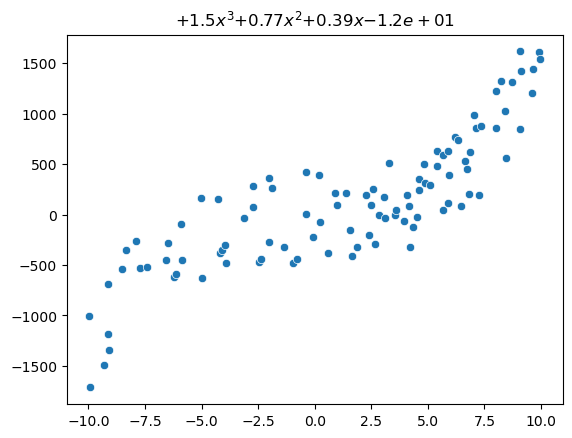

In [1070]:
sns.scatterplot(x=x, y=y_train)
plt.title(rf"${w[2]:+.2}$$x^3$${w[1]:+.2}$$x^2$${w[0]:+.2}$$x$${b:+.2}$")
plt.show()

In [1071]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    return np.sum((np.dot(x, w) + b - y) ** 2) / (2 * m)

In [1072]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = np.dot(np.dot(x, w) + b - y, x) / m
    dj_db = np.sum(np.dot(x, w) + b - y) / m
    return dj_dw, dj_db

In [1074]:
import copy
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        if i < 1000000:
            J_history.append(cost_function(x, y, w, b))
        
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i: 4d}: Cost {J_history[-1]:8.2f}    ")
    
    return w, b, J_history

In [1086]:
x_train = x.reshape(-1, 1)
m, n = x_train.shape
w_init = np.zeros(n)
b_init = 0.0

iterations = 100000
alpha = 1.0e-4

w_final, b_final, J_hist = gradient_descent(x_train, y_train, w_init, b_init, compute_cost, compute_gradient, alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")

Iteration    0: Cost 217918.34    
Iteration  10000: Cost 62621.20    
Iteration  20000: Cost 62606.63    
Iteration  30000: Cost 62604.43    
Iteration  40000: Cost 62604.09    
Iteration  50000: Cost 62604.04    
Iteration  60000: Cost 62604.04    
Iteration  70000: Cost 62604.04    
Iteration  80000: Cost 62604.04    
Iteration  90000: Cost 62604.04    
b,w found by gradient descent: -11.59,[96.63340656] 


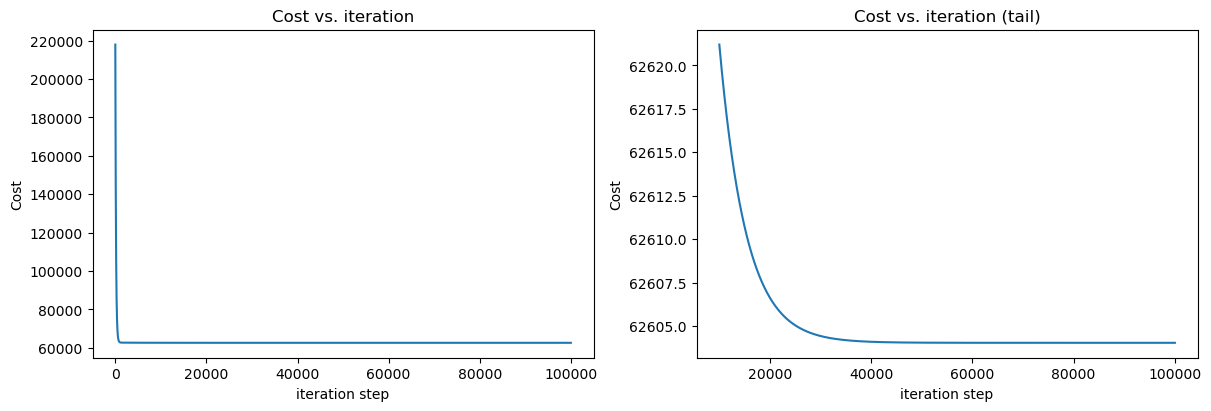

In [1087]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
num_hist = math.ceil(len(J_hist)/10)
ax1.plot(J_hist)
ax2.plot(num_hist + np.arange(len(J_hist[num_hist:])), J_hist[num_hist:])

ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

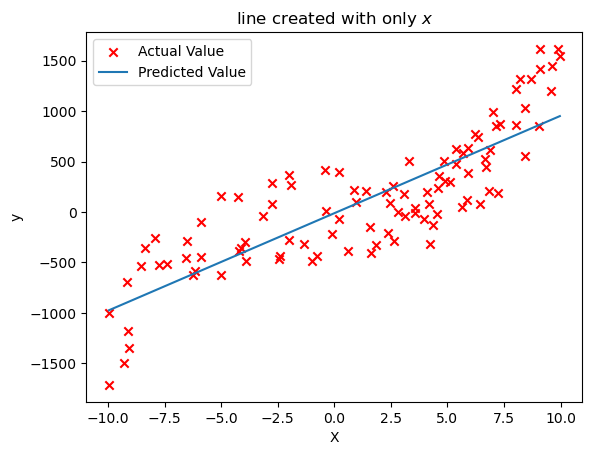

In [1088]:
plt.scatter(x, y_train, marker='x', c='r', label="Actual Value"); plt.title(r"line created with only $x$")
plt.plot(x,x_train@w_final + b_final, label="Predicted Value");  plt.xlabel("X"); plt.ylabel("y"); plt.legend(); plt.show()

In [1089]:
x_train = np.c_[x, x**2]
m, n = x_train.shape
w_init = np.zeros(n)
b_init = 0.0

iterations = 1000000
alpha = 1.0e-4

w_final, b_final, J_hist = gradient_descent(x_train, y_train, w_init, b_init, compute_cost, compute_gradient, alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")

Iteration    0: Cost 212157.23    
Iteration  100000: Cost 57957.47    
Iteration  200000: Cost 57956.92    
Iteration  300000: Cost 57956.92    
Iteration  400000: Cost 57956.92    
Iteration  500000: Cost 57956.92    
Iteration  600000: Cost 57956.92    
Iteration  700000: Cost 57956.92    
Iteration  800000: Cost 57956.92    
Iteration  900000: Cost 57956.92    
b,w found by gradient descent: -119.71,[95.3930699   3.24790958] 


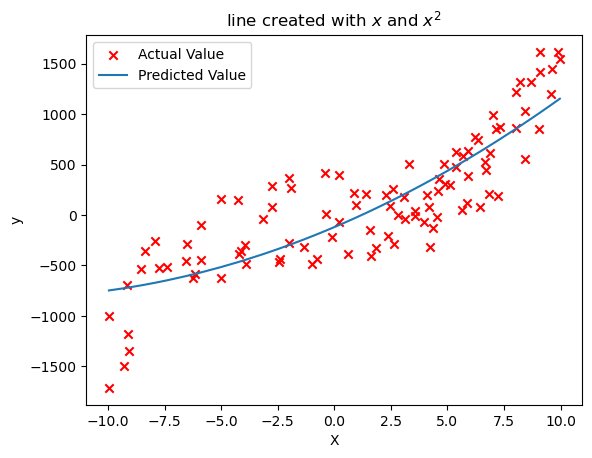

In [1090]:
plt.scatter(x, y_train, marker='x', c='r', label="Actual Value"); plt.title("line created with $x$ and $x^2$")
plt.plot(x,x_train@w_final + b_final, label="Predicted Value");  plt.xlabel("X"); plt.ylabel("y"); plt.legend(); plt.show()

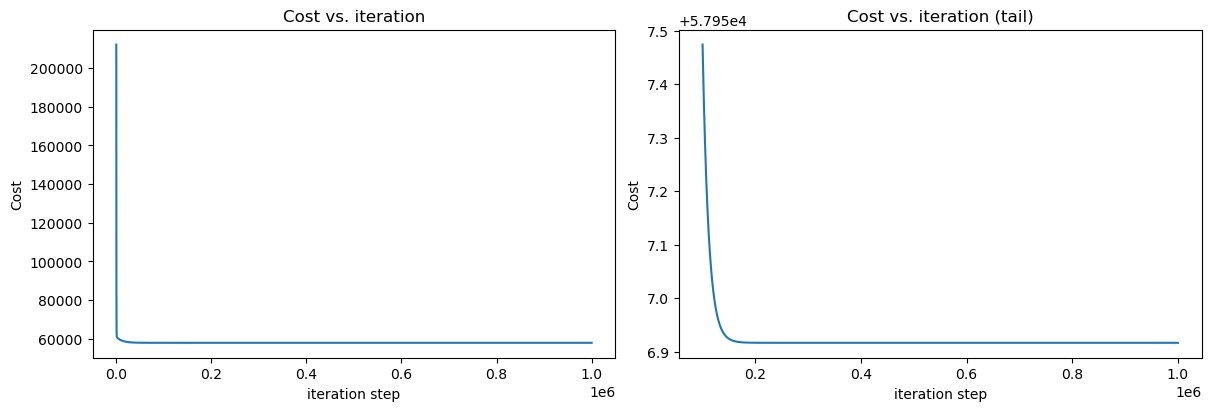

In [1091]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
num_hist = math.ceil(len(J_hist)/10)
ax1.plot(J_hist)
ax2.plot(num_hist + np.arange(len(J_hist[num_hist:])), J_hist[num_hist:])

ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

In [1092]:
x_train = np.c_[x, x**2, x**3]
m, n = x_train.shape
w_init = np.zeros(n)
b_init = 0.0

iterations = 1000000
alpha = 1.0e-5

w_final, b_final, J_hist = gradient_descent(x_train, y_train, w_init, b_init, compute_cost, compute_gradient, alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")

Iteration    0: Cost 80230.05    
Iteration  100000: Cost 37352.56    
Iteration  200000: Cost 37151.45    
Iteration  300000: Cost 37063.97    
Iteration  400000: Cost 37025.92    
Iteration  500000: Cost 37009.37    
Iteration  600000: Cost 37002.17    
Iteration  700000: Cost 36999.04    
Iteration  800000: Cost 36997.68    
Iteration  900000: Cost 36997.09    
b,w found by gradient descent: -60.83,[16.05018545  2.43722968  1.30640177] 


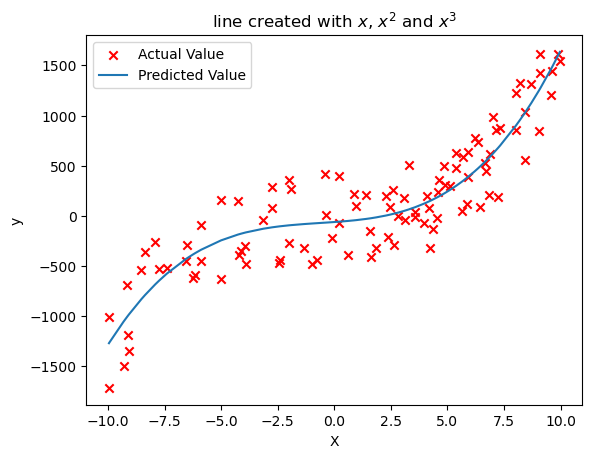

In [1093]:
plt.scatter(x, y_train, marker='x', c='r', label="Actual Value"); plt.title("line created with $x$, $x^2$ and $x^3$")
plt.plot(x,x_train@w_final + b_final, label="Predicted Value");  plt.xlabel("X"); plt.ylabel("y"); plt.legend(); plt.show()

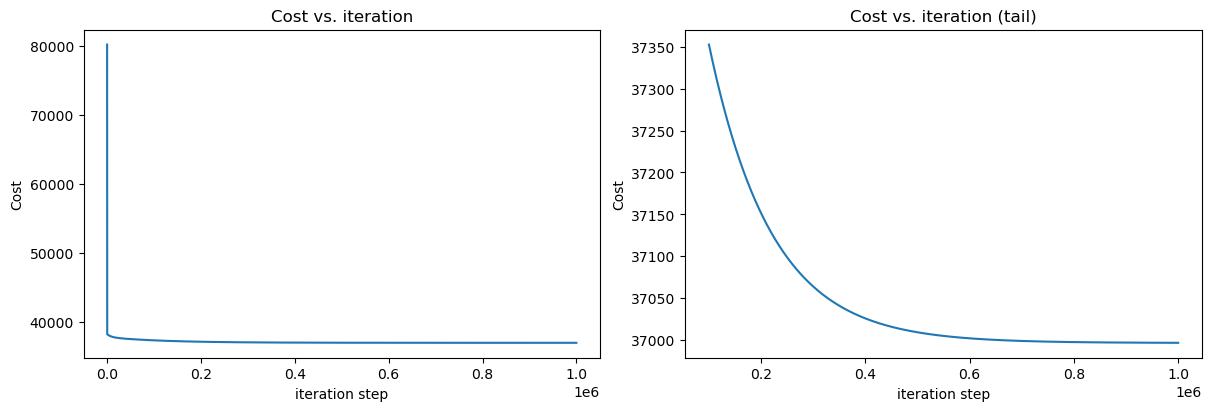

In [1094]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
num_hist = math.ceil(len(J_hist)/10)
ax1.plot(J_hist)
ax2.plot(num_hist + np.arange(len(J_hist[num_hist:])), J_hist[num_hist:])

ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

In [1095]:
for i in range(len(w)):
    print(f"Actual w[{i}] selected randomly: {w[i]},\tPredicted w[{i}]: {w_final[i]}")

print(f"Actual b selected randomly: {b},\tPredicted b: {b_final}")


Actual w[0] selected randomly: 0.38624012321358947,	Predicted w[0]: 16.050185449368325
Actual w[1] selected randomly: 0.7676171341919034,	Predicted w[1]: 2.4372296773068305
Actual w[2] selected randomly: 1.4961342932220898,	Predicted w[2]: 1.3064017688243668
Actual b selected randomly: -12.277078327347066,	Predicted b: -60.82521273846718
